In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pandas as pd
import geopandas as gpd
import contextily as ctx
import os
from shapely.geometry import Point
from time import time

sns.set()

In [2]:
def plot_barh(series, height=6, width=8, title=''):
    f, ax = plt.subplots(1, figsize=(width, height))
    series.plot(kind='barh', ax=ax, color='gray')
    ax.get_xaxis().set_major_formatter(
                matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    ax.set_title(title, fontsize=16)
    plt.xticks(fontsize=14, rotation=45)
    plt.yticks(fontsize=14)
    plt.show()

## Load Teranet data

In [3]:
data_path = '../../data/'
teranet_path = data_path + 'teranet/'
os.listdir(teranet_path)

['4_Teranet_lu_predict.csv',
 '1.1_Teranet_DA.csv',
 '1.3_Teranet_DA_TAZ_PG_FSA.csv',
 '2_Teranet_consistent.csv',
 'parcel16_epoi13.csv',
 '1.2_Teranet_DA_TAZ.csv',
 '4_Teranet_lu_encode.csv',
 '1.4_Teranet_DA_TAZ_FSA_LU_LUDMTI.csv',
 '1.4_Teranet_DA_TAZ_FSA_LU.csv',
 '.ipynb_checkpoints',
 'ParcelLandUse.zip',
 'ParcelLandUse',
 'HHSaleHistory.csv',
 '3_Teranet_nonan_new_cols.csv',
 'GTAjoinedLanduseSales']

In [4]:
t = time()

df = pd.read_csv(teranet_path + '4_Teranet_lu_predict.csv',
                 parse_dates=['registration_date'], low_memory=False)
elapsed = time() - t
print("----- DataFrame loaded"
      "\nin {0:,.2f} seconds ({1:.2f} minutes)".format(elapsed, elapsed / 60) + 
      "\nwith {0:,} rows\nand {1:,} columns"
      .format(df.shape[0], df.shape[1]) + 
      "\n-- Column names:\n", df.columns)

----- DataFrame loaded
in 105.46 seconds (1.76 minutes)
with 5,188,513 rows
and 80 columns
-- Column names:
 Index(['transaction_id', 'lro_num', 'pin', 'consideration_amt',
       'registration_date', 'postal_code', 'unitno', 'street_name',
       'street_designation', 'street_direction', 'municipality',
       'street_number', 'x', 'y', 'dauid', 'csduid', 'csdname', 'taz_o', 'fsa',
       'pca_id', 'postal_code_dmti', 'pin_lu', 'landuse', 'prop_code',
       'dmti_lu', 'street_name_raw', 'year', 'year_month', 'year3',
       'census_year', 'census2001_year', 'tts_year', 'tts1991_year', 'xy',
       'pin_total_sales', 'xy_total_sales', 'pin_prev_sales', 'xy_prev_sales',
       'xy_first_sale', 'pin_years_since_last_sale',
       'xy_years_since_last_sale', 'xy_years_to_next_sale',
       'da_days_since_last_sale', 'da_years_since_last_sale',
       'xy_sale_next_6m', 'price_2016', 'pin_price_cum_sum',
       'xy_price_cum_sum', 'pin_price_pct_change', 'xy_price_pct_change',
       'pri

In [5]:
df.columns[-60:]

Index(['postal_code_dmti', 'pin_lu', 'landuse', 'prop_code', 'dmti_lu',
       'street_name_raw', 'year', 'year_month', 'year3', 'census_year',
       'census2001_year', 'tts_year', 'tts1991_year', 'xy', 'pin_total_sales',
       'xy_total_sales', 'pin_prev_sales', 'xy_prev_sales', 'xy_first_sale',
       'pin_years_since_last_sale', 'xy_years_since_last_sale',
       'xy_years_to_next_sale', 'da_days_since_last_sale',
       'da_years_since_last_sale', 'xy_sale_next_6m', 'price_2016',
       'pin_price_cum_sum', 'xy_price_cum_sum', 'pin_price_pct_change',
       'xy_price_pct_change', 'price_da_pct_change', 'med_price_xy',
       'med_price_year', 'price_to_med_xy', 'price_to_med_year', 'outlier_y_3',
       'outlier_y_5', 'outlier_y_10', 'outlier_y_20', 'outlier_xy_2',
       'outlier_xy_4', 'outlier_xy_10', 'code', 'lu_class', 'luc_detached',
       'luc_condo', 'luc_strata', 'luc_duplex', 'luc_townhouse', 'luc_mixuse',
       'luc_underdeveloped', 'luc_mixedcomplex', 'luc_industria

In [6]:
labels_list = ['condo', 'detached', 'duplex_townhouse', 'other']

In [7]:
mask1 = df['lucr_predict'].notnull()
df = df[mask1]

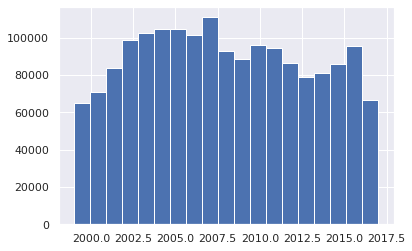

In [8]:
df['year'].hist(bins=19)

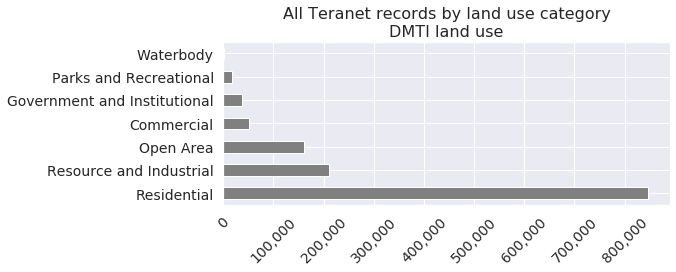

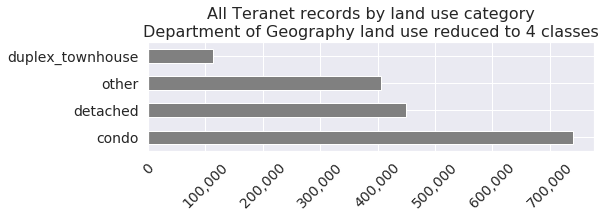

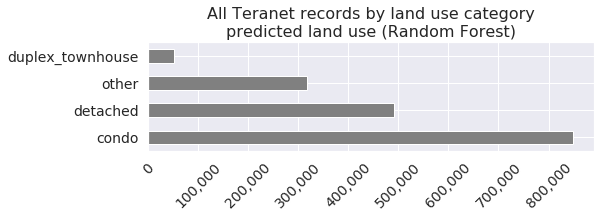

In [9]:
title = "All Teranet records by land use category\nDMTI land use"
plot_barh(df['dmti_lu'].value_counts(), title=title, height=3)

title = "All Teranet records by land use category\nDepartment of Geography land use reduced to 4 classes"
plot_barh(df['lucr'].value_counts(), title=title, height=2)

title = "All Teranet records by land use category\npredicted land use (Random Forest)"
plot_barh(df['lucr_predict'].value_counts(), title=title, height=2)

### Join geometry from x and y attributes

### Pick a target point

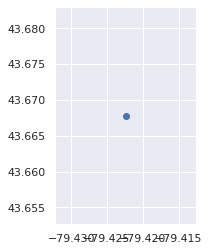

In [10]:
target_point = pd.DataFrame({'target_point': 1}, index=range(1))
target_point['geometry'] = Point([-79.422409, 43.6678197])
target_point_gdf = gpd.GeoDataFrame(target_point, geometry='geometry')
target_point_gdf.crs = {'init': 'epsg:4326', 'no_defs': True}
target_point_gdf.plot();

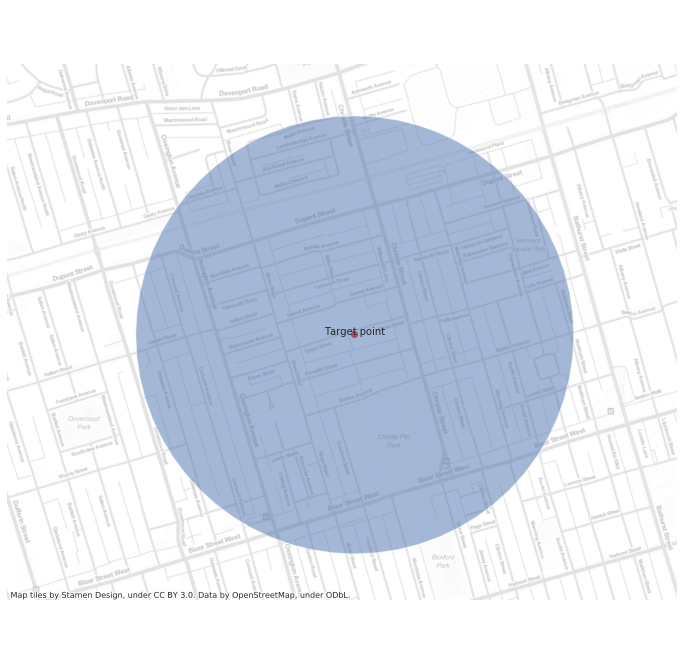

In [11]:
buffer_size = 1000     # size of buffer to draw around the target point, in meters

buffer_gdf = gpd.GeoDataFrame(target_point_gdf.to_crs(epsg=3857).buffer(buffer_size))
buffer_gdf = buffer_gdf.rename(columns={0:'geometry'}).set_geometry('geometry')
buffer_gdf.crs = {'init': 'epsg:3857'}
buffer_gdf = buffer_gdf.to_crs(epsg=4326)

f, ax = plt.subplots(1, figsize=(12, 12))
target_point_gdf.to_crs(epsg=3857).plot(ax=ax, color='red', alpha=0.8)
buffer_gdf.to_crs(epsg=3857).plot(ax=ax, alpha=0.5)
ctx.add_basemap(ax, url=ctx.sources.ST_TONER_LITE,
                alpha=0.25)
ax.text(target_point_gdf.to_crs(epsg=3857).loc[0, 'geometry'].x,
        target_point_gdf.to_crs(epsg=3857).loc[0, 'geometry'].y,
        "Target point", fontsize=10, ha='center')
ax.set_axis_off()
plt.axis('equal')
plt.show()

### Take Teranet subset

In [12]:
min_year = 2008
max_year = 2014
s = df.query('year >= @min_year & year <= @max_year')
print("{0:,} records in the subset from {1} to {2}.".format(len(s), min_year, max_year))

618,518 records in the subset from 2008 to 2014.


In [13]:
# combine values in columns 'x' and 'y' into a POINT geometry object
t = time()
geometry = [Point(xy) for xy in zip(s['x'], s['y'])]
# generate a new GeoDataFrame by adding point geometry to data frame 'teranet_sales_data'
gdf = gpd.GeoDataFrame(s, geometry=geometry)
elapsed = time() - t
print("\n----- Geometry generated from 'X' and 'Y' pairs, GeoDataFrame created!"
      "\nin {0:.2f} seconds ({1:.2f} minutes)".format(elapsed, elapsed / 60) + 
      "\nwith {0:,} rows\nand {1:,} columns"
      .format(gdf.shape[0], gdf.shape[1]) + 
      "\n-- Column names:\n", gdf.columns)

# add CRS for WGS84 (lat-long) to GeoDataFrame with Teranet records
gdf.crs = {'proj': 'latlong', 
                   'ellps': 'WGS84', 
                   'datum': 'WGS84', 
                   'no_defs': True}
print("\n----- CRS dictionary for WGS84 added to geo data frame 'teranet_gdf'!")


----- Geometry generated from 'X' and 'Y' pairs, GeoDataFrame created!
in 9.10 seconds (0.15 minutes)
with 618,518 rows
and 81 columns
-- Column names:
 Index(['transaction_id', 'lro_num', 'pin', 'consideration_amt',
       'registration_date', 'postal_code', 'unitno', 'street_name',
       'street_designation', 'street_direction', 'municipality',
       'street_number', 'x', 'y', 'dauid', 'csduid', 'csdname', 'taz_o', 'fsa',
       'pca_id', 'postal_code_dmti', 'pin_lu', 'landuse', 'prop_code',
       'dmti_lu', 'street_name_raw', 'year', 'year_month', 'year3',
       'census_year', 'census2001_year', 'tts_year', 'tts1991_year', 'xy',
       'pin_total_sales', 'xy_total_sales', 'pin_prev_sales', 'xy_prev_sales',
       'xy_first_sale', 'pin_years_since_last_sale',
       'xy_years_since_last_sale', 'xy_years_to_next_sale',
       'da_days_since_last_sale', 'da_years_since_last_sale',
       'xy_sale_next_6m', 'price_2016', 'pin_price_cum_sum',
       'xy_price_cum_sum', 'pin_price_pc

### Perform spatial join of the buffer with a Teranet subset

In [14]:
gdf.crs

{'proj': 'latlong', 'ellps': 'WGS84', 'datum': 'WGS84', 'no_defs': True}

In [15]:
buffer_gdf.crs

{'init': 'epsg:4326', 'no_defs': True}

In [16]:
t = time()
sgdf = gpd.sjoin(gdf, buffer_gdf, how='inner', op='within')
elapsed = time() - t
print('{0:,} transactions occured from {1} to {2} within the boundary of the buffer.'.
     format(len(sgdf), min_year, max_year))
print("Saved in a new GeoDataFrame. Took {0:,.2f} seconds ({1:,.2f} minutes)."
      .format(elapsed, elapsed / 60))

/home/stepan/anaconda3/envs/gds/lib/python3.6/site-packages/geopandas/tools/sjoin.py:44: UserWarning: CRS of frames being joined does not match!
  warn('CRS of frames being joined does not match!')


201 transactions occured from 2008 to 2014 within the boundary of the buffer.
Saved in a new GeoDataFrame. Took 23.62 seconds (0.39 minutes).


Took 1.84 seconds (0.03 minutes) to plot


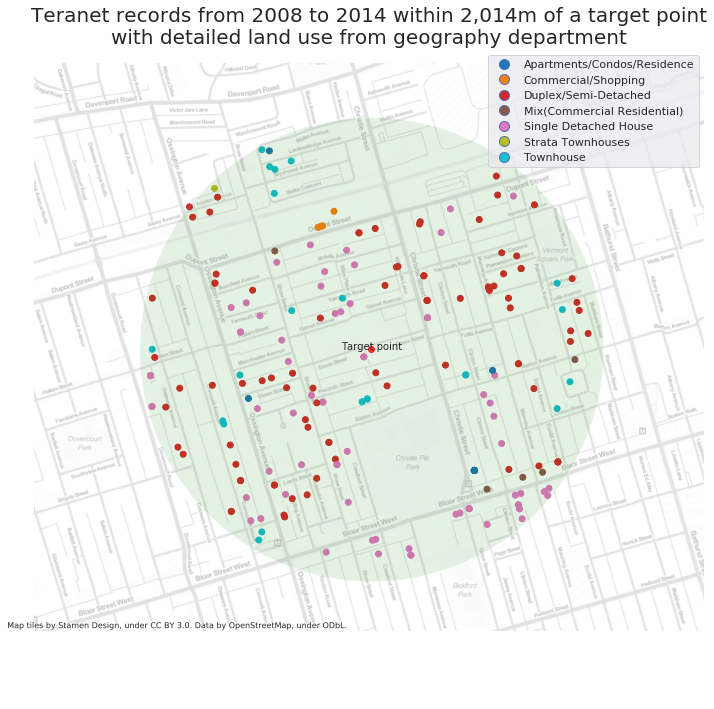

In [17]:
t = time()

# generate figure and axis
f, ax = plt.subplots(1, figsize=(12, 12))

# plot the subset, target point and the buffer
sgdf.dropna(subset=['code']).to_crs(epsg=3857)\
    .plot(ax=ax, column='code', categorical=True, legend=True)
buffer_gdf.to_crs(epsg=3857).plot(ax=ax, color='green', alpha=0.1)
target_point_gdf.to_crs(epsg=3857).plot(ax=ax, color='red', alpha=0.8)
ax.text(target_point_gdf.to_crs(epsg=3857).loc[0, 'geometry'].x,
        target_point_gdf.to_crs(epsg=3857).loc[0, 'geometry'].y,
        "Target point", fontsize=10, ha='center')

# add basemap
ctx.add_basemap(ax, url=ctx.sources.ST_TONER_LITE,
                alpha=0.25)

# set axis parameters
ax.set_title("Teranet records from {0} to {1} within {1:,}m of a target point"
             "\nwith detailed land use from geography department".format(min_year, max_year, buffer_size),
            fontsize=20)
ax.set_axis_off()
plt.axis('equal')
minX, minY, maxX, maxY = sgdf.to_crs(epsg=3857).total_bounds
ax.set_xlim(minX - 500, maxX + 500)
ax.set_ylim(minY - 500, maxY + 300)

elapsed = time() - t
print("Took {0:,.2f} seconds ({1:,.2f} minutes) to plot".format(elapsed, elapsed / 60))
plt.savefig('results/maps/target_point_lugeo.png', dpi=400)

Took 1.79 seconds (0.03 minutes) to plot


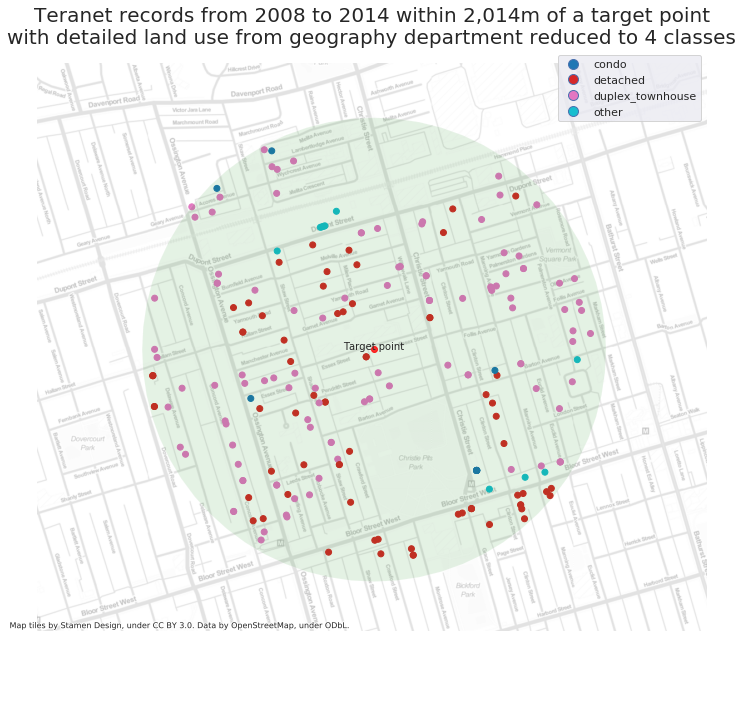

In [18]:
col = 'lucr'

t = time()

# generate figure and axis
f, ax = plt.subplots(1, figsize=(12, 12))

# plot the subset, target point and the buffer
sgdf.dropna(subset=[col]).to_crs(epsg=3857)\
    .plot(ax=ax, column=col, categorical=True, legend=True)
buffer_gdf.to_crs(epsg=3857).plot(ax=ax, color='green', alpha=0.1)
target_point_gdf.to_crs(epsg=3857).plot(ax=ax, color='red', alpha=0.8)
ax.text(target_point_gdf.to_crs(epsg=3857).loc[0, 'geometry'].x,
        target_point_gdf.to_crs(epsg=3857).loc[0, 'geometry'].y,
        "Target point", fontsize=10, ha='center')

# add basemap
ctx.add_basemap(ax, url=ctx.sources.ST_TONER_LITE,
                alpha=0.25)

# set axis parameters
ax.set_title("Teranet records from {0} to {1} within {1:,}m of a target point"
             "\nwith detailed land use from geography department reduced to 4 classes"
             .format(min_year, max_year, buffer_size), fontsize=20)
ax.set_axis_off()
plt.axis('equal')
minX, minY, maxX, maxY = sgdf.to_crs(epsg=3857).total_bounds
ax.set_xlim(minX - 500, maxX + 500)
ax.set_ylim(minY - 500, maxY + 300)

elapsed = time() - t
print("Took {0:,.2f} seconds ({1:,.2f} minutes) to plot".format(elapsed, elapsed / 60))
plt.savefig('results/maps/target_point_lucr_predict.png', dpi=400)

Took 2.20 seconds (0.04 minutes) to plot


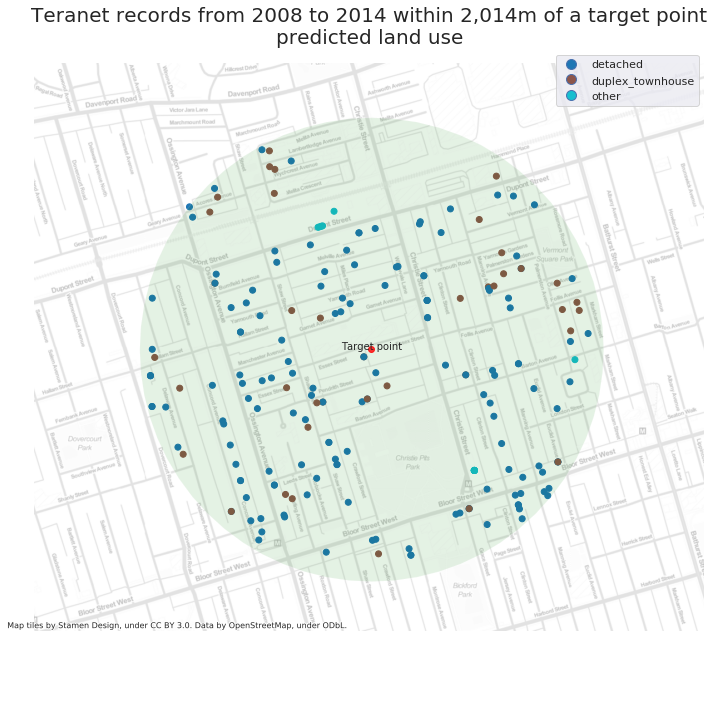

In [21]:
col = 'lucr_predict'

t = time()

# generate figure and axis
f, ax = plt.subplots(1, figsize=(12, 12))

# plot the subset, target point and the buffer
sgdf.dropna(subset=[col]).to_crs(epsg=3857)\
    .plot(ax=ax, column=col, categorical=True, legend=True)
buffer_gdf.to_crs(epsg=3857).plot(ax=ax, color='green', alpha=0.1)
target_point_gdf.to_crs(epsg=3857).plot(ax=ax, color='red', alpha=0.8)
ax.text(target_point_gdf.to_crs(epsg=3857).loc[0, 'geometry'].x,
        target_point_gdf.to_crs(epsg=3857).loc[0, 'geometry'].y,
        "Target point", fontsize=10, ha='center')

# add basemap
ctx.add_basemap(ax, url=ctx.sources.ST_TONER_LITE,
                alpha=0.25)

# set axis parameters
ax.set_title("Teranet records from {0} to {1} within {1:,}m of a target point"
             "\npredicted land use"
             .format(min_year, max_year, buffer_size), fontsize=20)
ax.set_axis_off()
plt.axis('equal')
minX, minY, maxX, maxY = sgdf.to_crs(epsg=3857).total_bounds
ax.set_xlim(minX - 500, maxX + 500)
ax.set_ylim(minY - 500, maxY + 300)

elapsed = time() - t
print("Took {0:,.2f} seconds ({1:,.2f} minutes) to plot".format(elapsed, elapsed / 60))
plt.savefig('results/maps/target_point_lucr_predict.png', dpi=400)

In [ ]:
f, ax = plt.subplots(1, figsize=(12, 8))

sns.swarmplot(data=s, y='lucr', x='price_2016', hue='dmti_lu', ax=ax)

ax.set_title("Teranet records in {0} within {1:,}m of a target point"
             "\nwith land use from DMTI and geo department".format(year, buffer_size),
            fontsize=20)
# set axis parameters
ax.set_ylabel("Geog. dept. land use", fontsize=16)
ax.set_xlabel("Consideration amount (in 2016 dollars)", fontsize=16)
ax.legend(['Consideration amount (price) distribution'])
ax.set_title("Transactions in {0} within {1:,}m of the parking lot, swarmplot".format(year, buffer_size) +
             "\nby geography department land use", fontsize=20)
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.legend(loc='best')
ax.grid(axis='x', color='black', linestyle=':')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()
#plt.savefig('results/maps/teranet_parking_swarmplot.png', dpi=300, bbox_inches='tight')